In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

## Naive Implementation

In [16]:
def create_mandelbrot(c):
    f = lambda x: x**2 + c
    return f

def stability(number, it):
    return number / it

def run(f, it):
    x = 0
    
    number = 0
    for i in range(it):
        number = i
        x = f(x)
        if abs(x) > 2:
            break
    
    return stability(number, it)


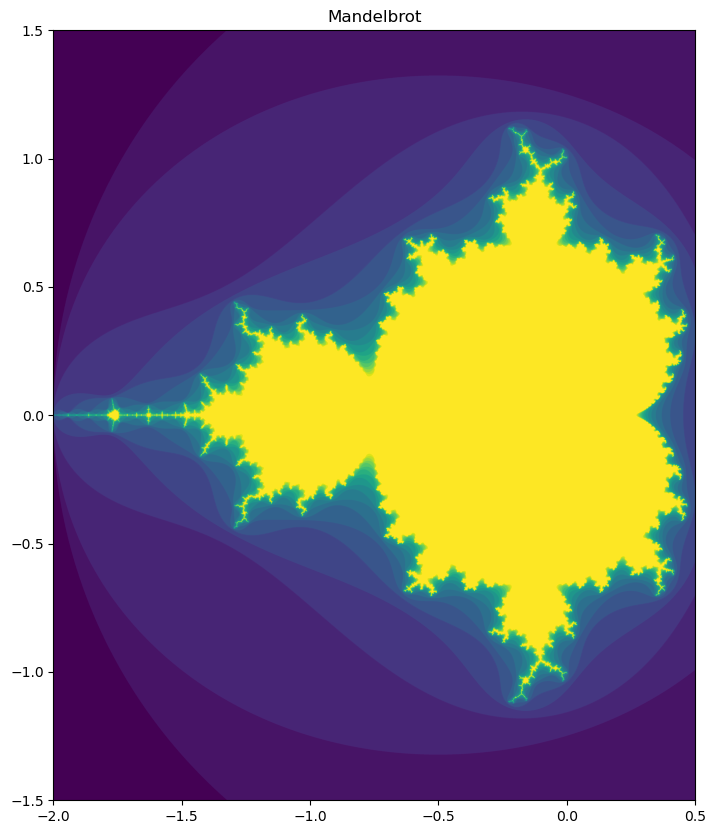

In [25]:
def plot_mandelbrot(r_upper=.5, r_lower=-2, i_upper=1.5, i_lower=-1.5, it=20):
    x = np.arange(r_lower, r_upper, 0.0005)
    y = np.arange(i_lower, i_upper, 0.0005)

    xv, yv = np.meshgrid(x, y)

    complex = xv + yv * 1j

    res = np.zeros(complex.shape)

    for idx, c in np.ndenumerate(complex):
        res[idx] = run(create_mandelbrot(c), it)

    plt.figure(figsize=(15,10))
    plt.imshow(res, extent=[r_lower, r_upper, i_lower, i_upper])
    plt.title("Mandelbrot")
    

plot_mandelbrot()



## Matrix-wise Implementation

In [26]:
R_UPPER = .5
R_LOWER = -2
I_UPPER = 1.3
I_LOWER = -1.3

In [27]:
def mandelbrot(x, c):
    return x**2 + c

def create_grid(stepsize, r_upper=R_UPPER, r_lower=R_LOWER, i_upper=I_UPPER, i_lower=I_LOWER):
    x = np.arange(r_lower, r_upper, stepsize)
    y = np.arange(i_lower, i_upper, stepsize)

    xv, yv = np.meshgrid(x, y)

    return xv + yv * 1j

In [34]:
# it: max number of iterations to run
# sample_step: the sample step size of the grid
def plot_mandelbrot(it, sample_step, cmap="viridis"):
    # to handle overflow of very large numbers
    err_setting = np.seterr(over='ignore', invalid='ignore')
    grid = create_grid(sample_step)

    x = 0
    res = []
    for i in range(it):
        x = mandelbrot(x, grid)

        res.append((np.abs(x) <= 2).astype(int))

    stabil = np.stack(res, axis=0).sum(axis=0)

    plt.figure(figsize=(15,10))
    plt.imshow(stabil, extent=[R_LOWER, R_UPPER, I_LOWER, I_UPPER], cmap=cmap)
    plt.title("Mandelbrot")
    

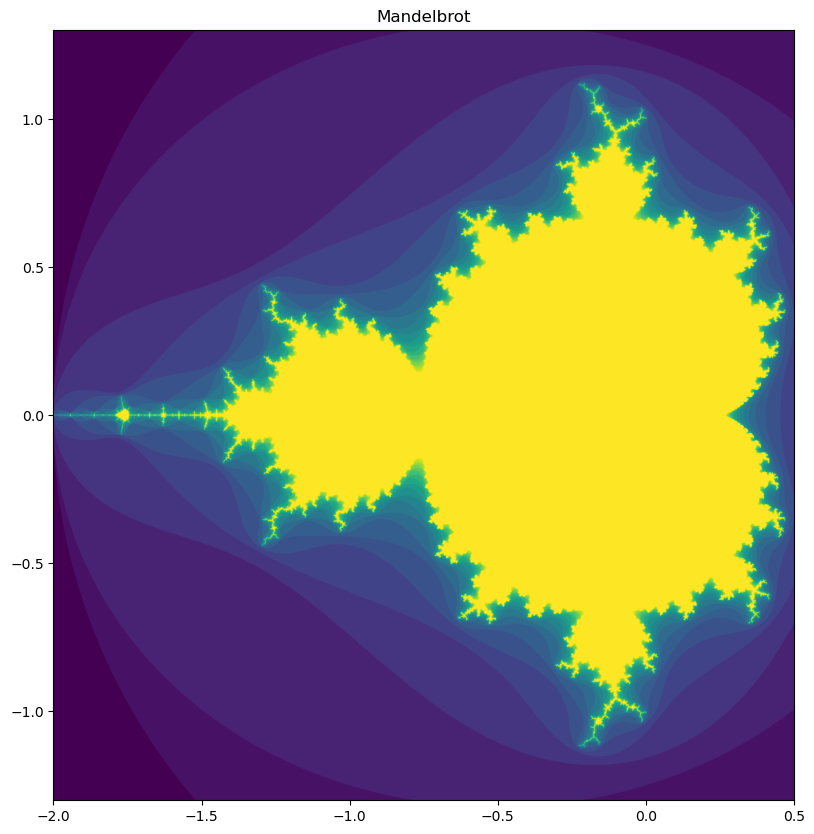

In [35]:
plot_mandelbrot(20, 0.0005)

You can alter the colormap! An Overview of availible maps can you find [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

In [33]:
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

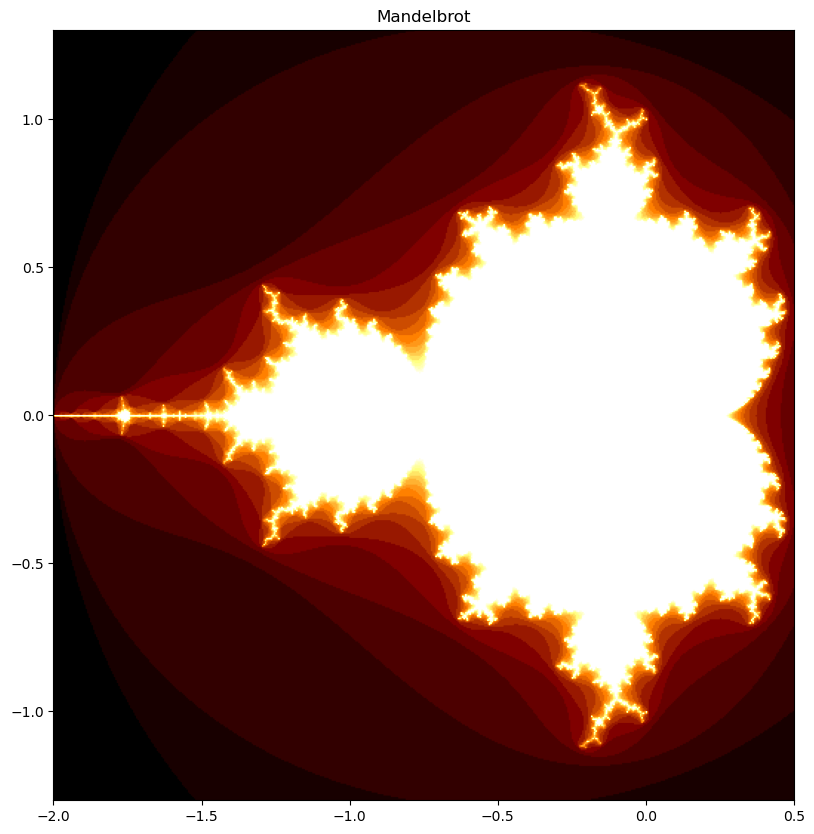

In [41]:
plot_mandelbrot(20, 0.005, "afmhot")